# Clustering Assignment-2
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States



In [1]:
##Import the file
import pandas as pd
df= pd.read_csv("D:/Shiva Data Science/ExcelR Assignments/Clustering/crime_data.csv", encoding='latin1')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [2]:
df.shape

(50, 5)

In [3]:
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


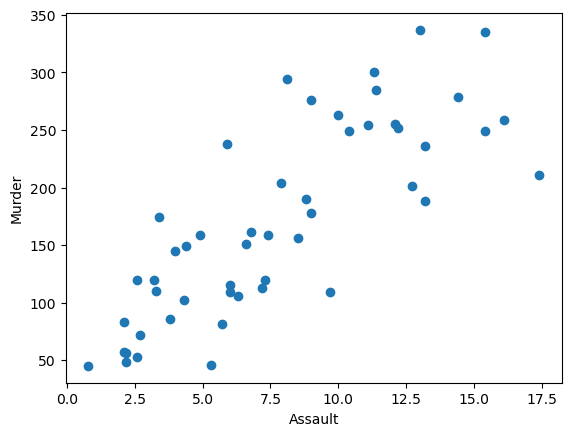

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df['Murder'],df['Assault'])
plt.ylabel('Murder')
plt.xlabel('Assault')
plt.show()

In [6]:
# Standardization

from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()

df.iloc[:,1:5] = MM.fit_transform(df.iloc[:,1:5])
df


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,0.746988,0.654110,0.440678,0.359173
1,Alaska,0.554217,0.746575,0.271186,0.961240
2,Arizona,0.439759,0.852740,0.813559,0.612403
3,Arkansas,0.481928,0.496575,0.305085,0.315245
4,California,0.493976,0.791096,1.000000,0.860465
5,Colorado,0.427711,0.544521,0.779661,0.811370
6,Connecticut,0.150602,0.222603,0.762712,0.098191
7,Delaware,0.307229,0.660959,0.677966,0.219638
8,Florida,0.879518,0.993151,0.813559,0.635659
9,Georgia,1.000000,0.568493,0.474576,0.478036


# Hierarchical Clustering

In [7]:
df_HC = df
df_HC

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,0.746988,0.654110,0.440678,0.359173
1,Alaska,0.554217,0.746575,0.271186,0.961240
2,Arizona,0.439759,0.852740,0.813559,0.612403
3,Arkansas,0.481928,0.496575,0.305085,0.315245
4,California,0.493976,0.791096,1.000000,0.860465
5,Colorado,0.427711,0.544521,0.779661,0.811370
6,Connecticut,0.150602,0.222603,0.762712,0.098191
7,Delaware,0.307229,0.660959,0.677966,0.219638
8,Florida,0.879518,0.993151,0.813559,0.635659
9,Georgia,1.000000,0.568493,0.474576,0.478036


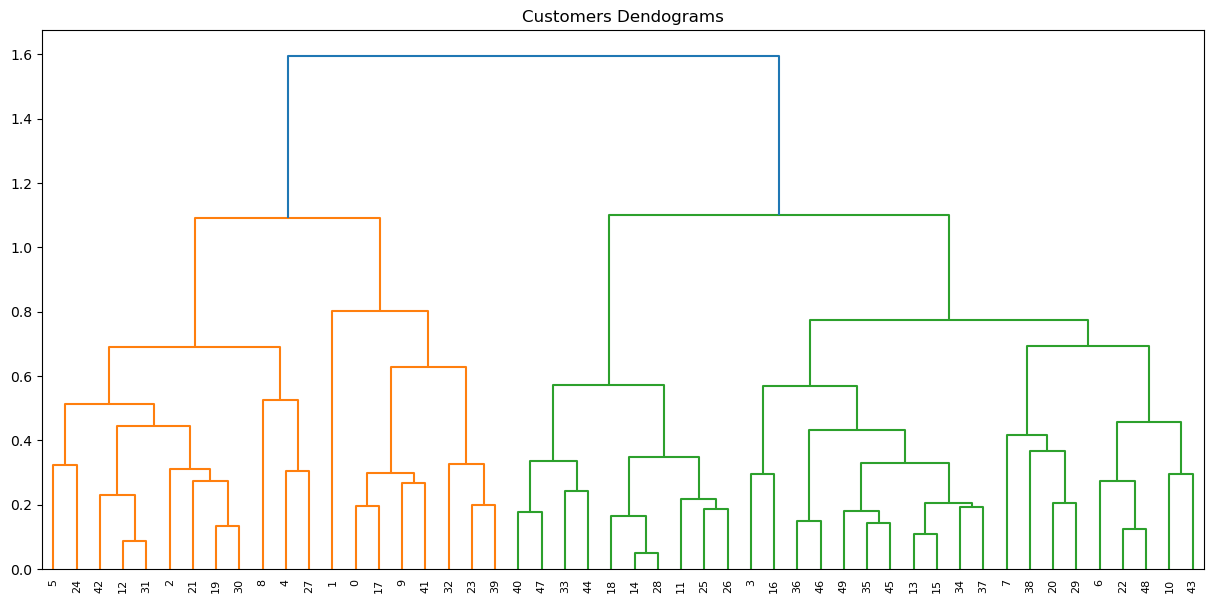

In [8]:
# Construct a dendrogram

import scipy.cluster.hierarchy as SCH
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7)) 
plt.title("Customers Dendograms")  
Dendrogram = SCH.dendrogram(SCH.linkage(df_HC.iloc[:,1:5] ,method ="complete"))

In [9]:
# Creating clusters
from sklearn.cluster import AgglomerativeClustering
Cluster =  AgglomerativeClustering(n_clusters=5, metric = "euclidean", linkage = "complete")

Y_HC = Cluster.fit_predict(df_HC.iloc[:,1:12])
Y_HC

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0], dtype=int64)

In [10]:
Cluster.labels_

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0], dtype=int64)

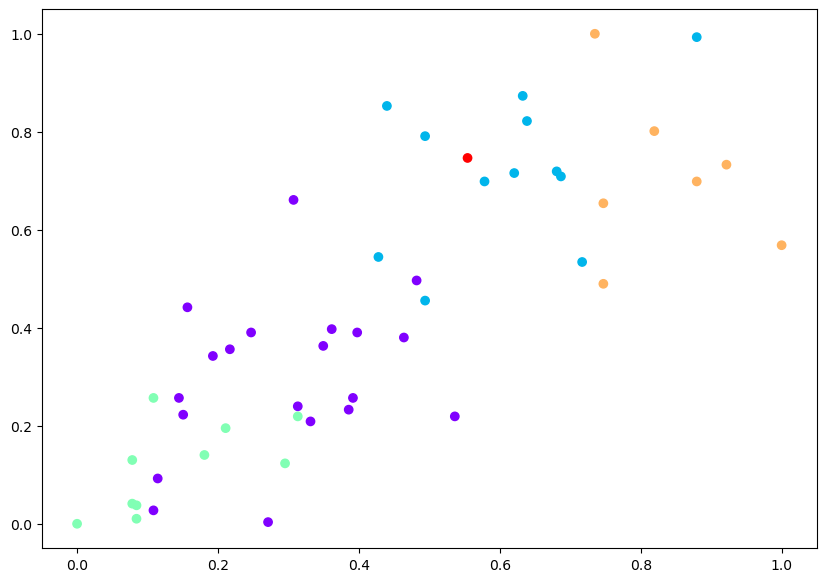

In [11]:

plt.figure(figsize=(10, 7))  
plt.scatter(df.iloc[:,1], df.iloc[:,2], c=Cluster.labels_, cmap='rainbow')  

In [12]:
#Assign clusters to the data set
df_HC['Gruop_type_HC'] =Cluster.labels_
df_HC['Gruop_type_HC']

0     3
1     4
2     1
3     0
4     1
5     1
6     0
7     0
8     1
9     3
10    0
11    2
12    1
13    0
14    2
15    0
16    0
17    3
18    2
19    1
20    0
21    1
22    0
23    3
24    1
25    2
26    2
27    1
28    2
29    0
30    1
31    1
32    3
33    2
34    0
35    0
36    0
37    0
38    0
39    3
40    2
41    3
42    1
43    0
44    2
45    0
46    0
47    2
48    0
49    0
Name: Gruop_type_HC, dtype: int64

In [13]:
# Add the Y Variable to the main data set
df_HC.groupby(['Gruop_type_HC'])

In [14]:
# Final Data set with Target variable
df_HC

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Gruop_type_HC
0,Alabama,0.746988,0.654110,0.440678,0.359173,3
1,Alaska,0.554217,0.746575,0.271186,0.961240,4
2,Arizona,0.439759,0.852740,0.813559,0.612403,1
3,Arkansas,0.481928,0.496575,0.305085,0.315245,0
4,California,0.493976,0.791096,1.000000,0.860465,1
5,Colorado,0.427711,0.544521,0.779661,0.811370,1
6,Connecticut,0.150602,0.222603,0.762712,0.098191,0
7,Delaware,0.307229,0.660959,0.677966,0.219638,0
8,Florida,0.879518,0.993151,0.813559,0.635659,1
9,Georgia,1.000000,0.568493,0.474576,0.478036,3


# K-Means clustering

In [15]:
df_KMean = df
df_KMean

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Gruop_type_HC
0,Alabama,0.746988,0.654110,0.440678,0.359173,3
1,Alaska,0.554217,0.746575,0.271186,0.961240,4
2,Arizona,0.439759,0.852740,0.813559,0.612403,1
3,Arkansas,0.481928,0.496575,0.305085,0.315245,0
4,California,0.493976,0.791096,1.000000,0.860465,1
5,Colorado,0.427711,0.544521,0.779661,0.811370,1
6,Connecticut,0.150602,0.222603,0.762712,0.098191,0
7,Delaware,0.307229,0.660959,0.677966,0.219638,0
8,Florida,0.879518,0.993151,0.813559,0.635659,1
9,Georgia,1.000000,0.568493,0.474576,0.478036,3


In [16]:
# Find the K value for this data set
from sklearn.cluster import KMeans

Inertia_Value = []

for i in range(1,10):
    Kmeans = KMeans(n_clusters=i , random_state=45)
    Kmeans.fit(df_KMean.iloc[:,1:5])
    Inertia_Value.append(Kmeans.inertia_)
print(Inertia_Value)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[13.184122550256443, 6.596893867946196, 5.010878493006417, 3.6834561535859134, 3.184261813967722, 2.9034793728430452, 2.577999498451258, 2.2881341218795974, 2.1173095931396055]


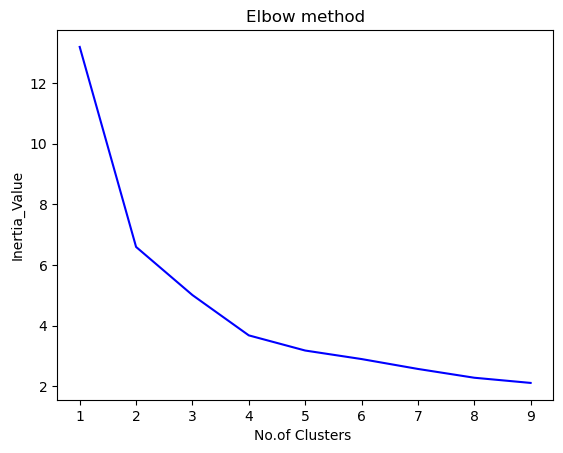

In [17]:
plt.plot(range(1,10),Inertia_Value,color="blue")
plt.xlabel("No.of Clusters ")
plt.title("Elbow method")
plt.ylabel("Inertia_Value")
plt.show()

In [18]:
# Built the cluster algorithm
from sklearn.cluster import KMeans
Cluster_new = KMeans(5,random_state=45)
Cluster_new.fit(df_KMean.iloc[:,1:12])


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=45)

In [19]:
Cluster_new.labels_

array([1, 4, 0, 2, 0, 0, 2, 2, 0, 1, 2, 3, 0, 2, 3, 2, 2, 1, 3, 0, 2, 0,
       2, 1, 0, 3, 3, 0, 3, 2, 0, 0, 1, 3, 2, 2, 2, 2, 2, 1, 3, 1, 0, 2,
       3, 2, 2, 3, 2, 2])

In [20]:
#Assign clusters to the data set
df_KMean["Gruop_type_Kmean"] = Cluster_new.labels_

In [21]:
# Add the Y Variable to the main data set
df_KMean.groupby(['Gruop_type_Kmean'])

In [22]:
# Final Data set with Target variable
df_KMean

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Gruop_type_HC,Gruop_type_Kmean
0,Alabama,0.746988,0.654110,0.440678,0.359173,3,1
1,Alaska,0.554217,0.746575,0.271186,0.961240,4,4
2,Arizona,0.439759,0.852740,0.813559,0.612403,1,0
3,Arkansas,0.481928,0.496575,0.305085,0.315245,0,2
4,California,0.493976,0.791096,1.000000,0.860465,1,0
5,Colorado,0.427711,0.544521,0.779661,0.811370,1,0
6,Connecticut,0.150602,0.222603,0.762712,0.098191,0,2
7,Delaware,0.307229,0.660959,0.677966,0.219638,0,2
8,Florida,0.879518,0.993151,0.813559,0.635659,1,0
9,Georgia,1.000000,0.568493,0.474576,0.478036,3,1


# DBSCAN

In [23]:
df_DB = df
df_DB

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Gruop_type_HC,Gruop_type_Kmean
0,Alabama,0.746988,0.654110,0.440678,0.359173,3,1
1,Alaska,0.554217,0.746575,0.271186,0.961240,4,4
2,Arizona,0.439759,0.852740,0.813559,0.612403,1,0
3,Arkansas,0.481928,0.496575,0.305085,0.315245,0,2
4,California,0.493976,0.791096,1.000000,0.860465,1,0
5,Colorado,0.427711,0.544521,0.779661,0.811370,1,0
6,Connecticut,0.150602,0.222603,0.762712,0.098191,0,2
7,Delaware,0.307229,0.660959,0.677966,0.219638,0,2
8,Florida,0.879518,0.993151,0.813559,0.635659,1,0
9,Georgia,1.000000,0.568493,0.474576,0.478036,3,1


In [24]:
# Select and import the library and fit the model
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8,min_samples=6)
dbscan.fit(df_DB.iloc[:,1:12])

DBSCAN(eps=0.8, min_samples=6)

In [25]:
dbscan.labels_

array([ 0, -1,  1,  2,  1,  1,  2,  2,  1,  0,  2,  3,  1,  2,  3,  2,  2,
        0,  3,  1,  2,  1,  2,  0,  1,  3,  3,  1,  3,  2,  1,  1,  0,  3,
        2,  2,  2,  2,  2,  0,  3,  0,  1,  2,  3,  2,  2,  3,  2,  2],
      dtype=int64)

In [26]:
#Assign clusters to the data set
df_DB["Group_type_DB"] = dbscan.labels_

In [27]:
# Add the Y Variable to the main data set
df_DB.groupby(['Group_type_DB'])

In [28]:
# Final Data set with Target variable
df_DB

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Gruop_type_HC,Gruop_type_Kmean,Group_type_DB
0,Alabama,0.746988,0.654110,0.440678,0.359173,3,1,0
1,Alaska,0.554217,0.746575,0.271186,0.961240,4,4,-1
2,Arizona,0.439759,0.852740,0.813559,0.612403,1,0,1
3,Arkansas,0.481928,0.496575,0.305085,0.315245,0,2,2
4,California,0.493976,0.791096,1.000000,0.860465,1,0,1
5,Colorado,0.427711,0.544521,0.779661,0.811370,1,0,1
6,Connecticut,0.150602,0.222603,0.762712,0.098191,0,2,2
7,Delaware,0.307229,0.660959,0.677966,0.219638,0,2,2
8,Florida,0.879518,0.993151,0.813559,0.635659,1,0,1
9,Georgia,1.000000,0.568493,0.474576,0.478036,3,1,0
